# B4.4 Problems
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2>Problem B4.1</h2>
    </header>

The amateur rocket engine is labeled according to its impulse and average thrust. One such engine has a thrust curve shown below. The rocket curve is copied from [Aerotech](https://aerotech-rocketry.com/products/product_83b63096-bb03-e999-143a-548a10f8c58e) and you can get the answer from the link.

<img src="P-B4.1.png"  width="500"/>

Using the graph and the [rocket classification table](https://en.wikipedia.org/wiki/Model_rocket_motor_classification) to estimate the impulse class of the engine. 

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2>Problem B4.2</h2>
    </header>

A 0.0050 kg particle is subject to a force given by $f_x = (2.0t^2 + 0.3t^5)~\textrm{N}$ in the time interval $t = [0,3]~\textrm{s}$. If the particle is traveling at +120.0 m/s initially, what is its velocity at $t = 3$ s?

In [1]:
%reset -f
import sympy as sym

#integral variable
t = sym.Symbol('t')

#function to integrate
f = 2.0*t**2 + 0.3*t**5 

#limits
t1 = 0.0
t2 = 3.0
impulse = sym.integrate(f,(t,t1,t2))

#values giving
m = 0.005
v1 = 120.0

v2 = sym.Symbol('v2')

#equation to be solved: 0 = impulse - mv2 + mv1
eq1 = impulse - m*v2 + m*v1

sol = sym.solve(eq1,v2)

#print only positive and real solution
print('Velocity at 3 s = '+str(sol[0]))

Velocity at 3 s = 11010.0000000000


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2>Problem B4.3</h2>
    </header>

A particle is subject to a net force shown on the graph below.

1. Find the momentum transfer to/from the particle due to this net force across the shown time interval.
2. If the particle has a mass of 0.40 kg and travels at +250.0 m/s at t = 5 s, what was its velocity at t = 0 s?
3. What is its velocity at t = 8 s?

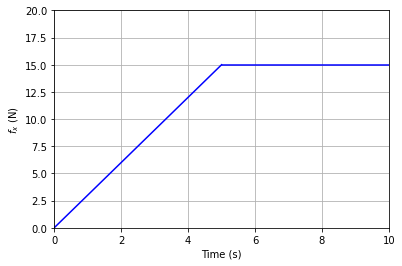

In [2]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

t1 = np.arange(0,5.1,0.1)
f1 = 0.0 + 3.0*t1
t2 = np.arange(0,5.1,0.1)+5.0
f2 = np.zeros(len(t2))+15

plt.figure()
plt.ylabel('$f_x$ (N)')
plt.xlabel('Time (s)')
ax = plt.gca()
ax.plot(t1,f1,'-',color='b')
ax.plot(t2,f2,'-',color='b')
ax.set_xlim([0, 10])
ax.set_ylim([0, 20])
ax.grid()
plt.show()

In [3]:
%reset -f

import sympy as sym

# Part 1
# momentum transfer is the area bound by the graph and horizontal axis.
# Area below triangle
A1 = (0.5)*(5)*(15.0)
# Area below rectangle
A2 = (5)*(15)
A = A1 + A2
print('Momentum transfer is '+str(A)+' kgm/s')

# Part 2
m = 0.40
v5 = 250.0
dp = A1

v0 = sym.Symbol('v0')
eq = dp - m*v5 + m*v0
sol = sym.solve(eq,v0)
print('Velocity at t = 0 s: '+str(sol)+' m/s')

# Part 3
#momentum transfer from t = 5 to t=9
dp = (3)*(15)
v8 = sym.Symbol('v8')
eq = dp - m*v8 + m*v5
sol = sym.solve(eq,v8)
print('Velocity at t = 8 s: '+str(sol)+' m/s')

Momentum transfer is 112.5 kgm/s
Velocity at t = 0 s: [156.250000000000] m/s
Velocity at t = 8 s: [362.500000000000] m/s


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2>Problem B4.4</h2>
    </header>

A helicopter with mass $2.35\times 10^4~\textrm{kg}$ has a position (in meters) given by $\vec{r} = (0.020t^3)\hat{i} + (2.2t)\hat{j} + (-0.060t^2)\hat{k}$. Find the net force on the helicopter at  t = 3.0 s.

This problem is a slightly modified version from OpenStax. Access for free at [https://openstax.org/books/university-physics-volume-1/pages/6-additional-problems](https://openstax.org/books/university-physics-volume-1/pages/6-additional-problems)

In [4]:
%reset -f
import sympy as sym

m = 2.35E4
#independent variable
t = sym.Symbol('t')

#position
rx = 0.020*t**3
ry = 2.2*t
rz = -0.060*t**2

ax = sym.diff(rx,t,2)
ay = sym.diff(ry,t,2)
az = sym.diff(rz,t,2)

ax = ax.evalf(subs={t: 3.0})
ay = ay.evalf(subs={t: 3.0})
az = az.evalf(subs={t: 3.0})

fx = m*ax
fy = m*ay
fz = m*az

f = [fx, fy, fz]

print('Net force at 3 s = '+str(f))

Net force at 3 s = [8460.00000000000, 0, -2820.00000000000]


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2>Problem B4.5</h2>
    </header>

A 2.25 kg box is moving across a horizontal floor. There is a coefficient of kinetic friction between the box and the floor of 0.400. A time-dependent applied pushing force of $f_x = 11 + 3.00t^2 - 0.500t^3$ is applied over the time interval of $t = [0.00,3.00]$ s. Assume the box is initially at rest and starting at $x = 0.00$ m.

1. What are the impulses delivered by each forces acting on the box during the first 3 seconds?
2. What is the net acceleration of the box during the first three seconds?
3. What is the velocity of the box at t = 3.00 s?
4. What is the position of the box at t = 3.00 s?
5. After 3 s, the pushing force is no longer applied. How long time from t = 0 s does it take the box to come to a stop?
6. What is its position when it comes to a stop?

In [5]:
%reset -f
import sympy as sym

m = 2.25
mu = 0.400
t1 = 0.0
t2 = 3.0
x1 = 0.0
v1x = 0.0
g = 9.81


# PART 1
#integral variable
t = sym.Symbol('t')

#forces: standard coordinate system

#gravity
fgy = -m*g

#normal
fny = -fgy

#friction 
ffx = -mu*fny

#push force
fpx = 11 + 3*t**2 - 0.500*t**3

#impulse: integral of force with respect to time

ifgy = sym.integrate(fgy,(t,t1,t2))
ifny = sym.integrate(fny,(t,t1,t2))
iffx = sym.integrate(ffx,(t,t1,t2))
ifpx = sym.integrate(fpx,(t,t1,t2))
print('Part 1')
print('Force of gravity impulse: '+ str(ifgy))
print('Normal force impulse: '+ str(ifny))
print('Force of friction impulse: '+ str(iffx))
print('Push force impulse: '+ str(ifpx))
print(' ')

# PART 2: Use f_net = ma --> 0 = ma - f_net

# x-direction
ax = sym.Symbol('ax')
eqx = m*ax - fpx - ffx
solx = sym.solve(eqx,ax)
print('Part 2')
print('a_x = '+str(solx[0]))
print(' ')
ax = solx[0]

# PART 3: integrate acceleration to find change in velocity, then add initial to get final
dvx = sym.integrate(ax,(t,t1,t2))
v2x = v1x + dvx
print('Part 3')
print('v2_x = '+str(v2x))
print(' ')

# PART 4
#integrate acceleration to get velocity (start from rest)
vx = sym.integrate(ax,t)
#integrate velocity to get position  (start at x = 0)
x = sym.integrate(vx,t)
x = x.evalf(subs={t: 3.0})
print('Part 4')
print('x = '+ str(x))
print(' ')

# Part 5: only force is friction and it is constant
# find acceleration and use kinematics equation to find time
a = sym.Symbol('a')
eq1 = m*a - ffx
sol1 = sym.solve(eq1,a)
a = sol1[0]
dt = (0.0 - v2x)/a
t = 3.0 + dt
print('Part 5')
print('Elapsed time: '+str(t))
print(' ')

# Part 6: find the additional distance after t = 3 s. 
# acceleration is constant so we can use derived equation of kinematics
dx = (0.0**2 - v2x**2)/(2*a)
xf = x + dx
print('Part 6')
print('Final position = '+str(xf))

Part 1
Force of gravity impulse: -66.2175000000000
Normal force impulse: 66.2175000000000
Force of friction impulse: -26.4870000000000
Push force impulse: 49.8750000000000
 


Part 2
a_x = -0.222222222222222*t**3 + 1.33333333333333*t**2 + 0.964888888888889
 
Part 3
v2_x = 10.3946666666667
 
Part 4
x = 10.6420000000000
 
Part 5
Elapsed time: 5.64899762147469
 
Part 6
Final position = 24.4097236380111


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2>Problem B4.6</h2>
    </header>

A UVU student has been tasked with pulling a 10.0 kg box full of research equipment up a slick rock hill in Capitol Reef National Park. The hill is sloped with an angle of $12.0^\circ$ from the horizontal. There is a coefficient of friction between the rock surface and the box of 0.55. The student is optimistic at first but quickly runs out of stamina as evidenced by the measured pulling force (in N) of $f(t) = 74 - 0.07t$ along the incline of the hill. The student and box starts out from rest.

1. How long time did it take before the net acceleration is zero?
2. What is the speed of the box at that time?
3. How far up the incline hill is the box at that time?
4. The student continues to move up the hill until the student can no longer pull at which the speed zero. At what time does that occur?
5. What distance up the hill did the box make it before the student need to take a break?
6. Create plots of the acceleration, velocity, and distance up the incline.

Time to zero acceleration: 11.8272761883619
Speed: 4.89595617125276
Distance up incline: 38.6038838956809
Time to exhaustion: 23.6545523767239
Distance to breaking point: 77.2077677913618


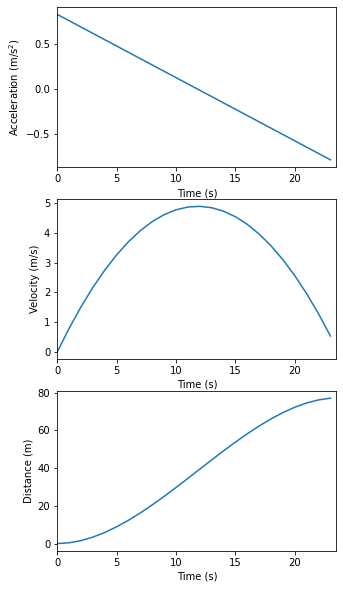

In [6]:
%reset -f
import sympy as sym
import numpy as np
from matplotlib import pyplot as plt 

m = 10.0
mu = 0.55
g = 9.81
theta = 12.0*np.pi/180.0
t1 = 0.0

# PART 1
# Use N2 in x and y. x positive up the incline

ax = 0.0
t = sym.Symbol('t')
fny = sym.Symbol('fny')

fgy = -m*g*np.cos(theta)
fgx = -m*g*np.sin(theta)
ffx = -mu*fny
fpx = 74 - 0.07*t

eqx = ax - fpx - ffx - fgx
eqy = 0 - fny - fgy
sol1 = sym.solve((eqx,eqy),(t,fny))

t2 = sol1[t]
print('Time to zero acceleration: '+str(t2))

# PART 2
del ax

ax = sym.Symbol('ax')
eqx = ax - fpx - ffx - fgx
eqy = 0 - fny - fgy
sol2 = sym.solve((eqx,eqy),(ax,fny))

ax = sol2[ax]
vx = sym.integrate(ax,t)
v = vx.evalf(subs={t: t2})
print('Speed: '+str(v))

# Part 3
x = sym.integrate(vx,t)
d1 = x.evalf(subs={t: t2})
print('Distance up incline: '+str(d1))

# Part 4
eq3 = vx
sol2 = sym.solve(eq3,t)
print('Time to exhaustion: '+str(sol2[1]))

# Part 5
t3 = sol2[1]
d2 = x.evalf(subs={t: t3})
print('Distance to breaking point: '+str(d2))


t_array = np.arange(0,t3,1)
a_array = []
v_array = []
x_array = []
for i in range(len(t_array)):
    a_result = ax.evalf(subs={t: t_array[i]})
    a_array.append(a_result)
    v_result = vx.evalf(subs={t: t_array[i]})
    v_array.append(v_result)
    x_result = x.evalf(subs={t: t_array[i]})
    x_array.append(x_result)

fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(5,10))

ax1.set(ylabel='Acceleration (m/s$^2$)', xlabel='Time (s)')
ax1.plot(t_array,a_array,'-')
ax1.set_xlim([0, np.max(t_array)+0.5])

ax2.set(ylabel='Velocity (m/s)', xlabel='Time (s)')
ax2.plot(t_array,v_array,'-')
ax2.set_xlim([0, np.max(t_array)+0.5])

ax3.set(ylabel='Distance (m)', xlabel='Time (s)')
ax3.plot(t_array,x_array,'-')
ax3.set_xlim([0, np.max(t_array)+0.5])

plt.show()

<hr style="height:2px;border-width:0;color:gray;background-color:gray">